

# **Trabalhando com planilhas do Excel**

In [ ]:
import pandas as pd

In [ ]:
#Leitura dos arquivos
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [ ]:
df4.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Recife,2019-01-01,162.61,981,1
1,Recife,2019-01-01,11.44,983,1
2,Recife,2019-02-10,12.94,983,5
3,Recife,2019-02-10,160.54,981,3
4,Recife,2019-02-14,19.89,983,7


In [ ]:
df = pd.concat([df1,df2,df3,df4,df5])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
0,Salvador,2018-01-01,31.06,1037,3
91,Fortaleza,2019-01-01,37.49,1002,1
36,Natal,2019-02-09,328.00,853,2
65,Aracaju,2018-01-01,145.54,1522,3
100,Salvador,2019-01-01,190.97,1036,2


In [ ]:
#Verificando o tipo de dado de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [ ]:
#Alterando o tipo de dado de determinada coluna
df["LojaID"] = df["LojaID"].astype("object")

In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
#Consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
#Substituindo os valores  nulos pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [ ]:
#Substituir os valores por zero
df["Vendas"].fillna(0, inplace=True)

In [ ]:
#Apagando as linhas com valores nulos
df.dropna(inplace=True)

In [ ]:
#Apagando as linhas com valores nulos com base em apenas 1 coluna
df.dropna(subset=["Vendas"], inplace=True)

In [ ]:
#Removendo linhas que estejam com valores faltantes em todas as colunas
df.dropna(how="all", inplace=True)

#**Criando colunas novas**

In [ ]:
# Criando a coluna de "Receita"
# -> df["Nome da coluna"] = "Conteúdo da coluna", nesse caso "Vendas" .mul de multiplicação "Qtde"
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
# Ou então o contrário, dividir
df["Receita/Vendas"] = df["Receita"] / df["Vendas"]
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [ ]:
#Retornando a maior receita
df["Receita"].max()

3544.0

In [ ]:
#Retornando a menor receita
df["Receita"].min()

3.34

In [ ]:
#nlargest - mostra o top X numeros com base na coluna Y -> df.nlargest(X, Y)
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [ ]:
#nsmallest - mostra o bottom X numeros com base na coluna Y -> df.nsmalles(X, Y)
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [ ]:
#Agrupamento por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [ ]:
#Ordenar o conjusto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


# **Trabalhando com datas**

In [37]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [38]:
#Transformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [39]:
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [40]:
#Transformando coluna de data de INT para Datetime
df["Data"] = pd.to_datetime(df["Data"])

In [41]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [42]:
#Agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [43]:
#Criando uma coluna de ano 
df["Ano_Venda"] = df['Data'].dt.year

In [44]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
8,Salvador,2019-02-11,4.96,1036,2,9.92,2.0,2019
91,Recife,2019-01-01,150.58,982,6,903.48,6.0,2019
66,Recife,2019-01-01,14.59,983,7,102.13,7.0,2019
104,Recife,2019-01-01,40.11,983,5,200.55,5.0,2019
50,Recife,2019-01-01,7.24,983,4,28.96,4.0,2019


In [45]:
df["mes_venda"], df["dia_venda"] = (df['Data'].dt.month, df['Data'].dt.day)

In [46]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda
125,Fortaleza,2019-03-02,37.60,983,4,150.40,4.0,2019,3,2
25,Fortaleza,2019-01-01,80.31,1004,4,321.24,4.0,2019,1,1
53,Fortaleza,2019-01-01,11.48,1002,4,45.92,4.0,2019,1,1
67,Salvador,2019-01-01,36.89,1037,2,73.78,2.0,2019,1,1
114,Aracaju,2018-01-01,10.17,1520,5,50.85,5.0,2018,1,1


In [47]:
#Retornando a data mais antiga
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [48]:
#Calculando a diferença de dias
df['diferença_dias'] = df['Data'] - df['Data'].min()

In [49]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferença_dias
178,Salvador,2019-01-02,39.28,1037,3,117.84,3.0,2019,1,2,366 days
57,Fortaleza,2019-01-01,129.07,1005,3,387.21,3.0,2019,1,1,365 days
125,Recife,2019-03-02,37.60,983,4,150.40,4.0,2019,3,2,425 days
68,Aracaju,2018-01-01,179.74,1520,2,359.48,2.0,2018,1,1,0 days
30,Aracaju,2018-01-01,119.21,1520,8,953.68,8.0,2018,1,1,0 days


In [51]:
#Criando a coluna de trimestre
df['semestre_venda'] = df['Data'].dt.quarter

In [52]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferença_dias,semestre_venda
23,Aracaju,2018-01-01,237.50,1523,7,1662.50,7.0,2018,1,1,0 days,1
202,Natal,2019-01-02,22.45,1036,1,22.45,1.0,2019,1,2,366 days,1
33,Aracaju,2018-01-01,35.09,1523,4,140.36,4.0,2018,1,1,0 days,1
139,Natal,2019-01-02,169.01,1036,1,169.01,1.0,2019,1,2,366 days,1
219,Natal,2019-01-02,19.67,1037,2,39.34,2.0,2019,1,2,366 days,1


In [54]:
#Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df['Data'].dt.year == 2019) & (df['Data'].dt.month == 3)]

In [55]:
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferença_dias,semestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days,1


# **Visualização de dados**

In [56]:
df['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

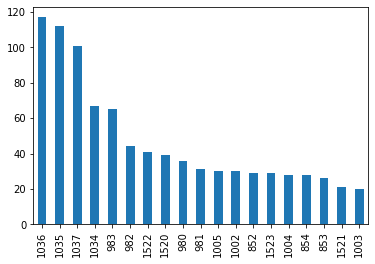

In [57]:
#Gráfico de barras verticais
df['LojaID'].value_counts(ascending=False).plot.bar()

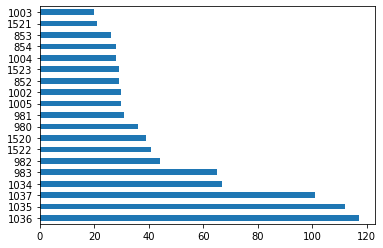

In [58]:
#Gráfico de barras horizontais, menor para maior
df['LojaID'].value_counts(ascending=False).plot.barh()

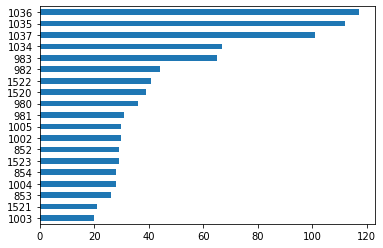

In [60]:
#Gráfico de barras horizontais, maior para menor
df['LojaID'].value_counts(ascending=True).plot.barh();

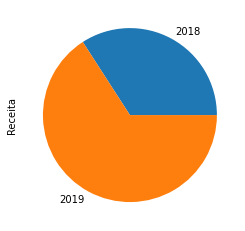

In [61]:
#Gráfico de pizza
df.groupby(df['Data'].dt.year)['Receita'].sum().plot.pie();

In [62]:
#Total de vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

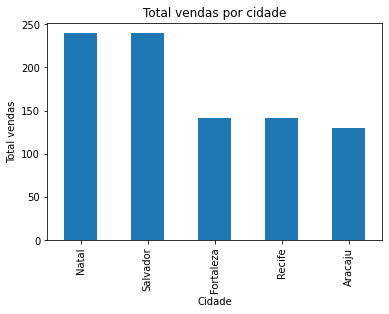

In [64]:
#Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title='Total vendas por cidade')
plt.xlabel('Cidade')
plt.ylabel('Total vendas');

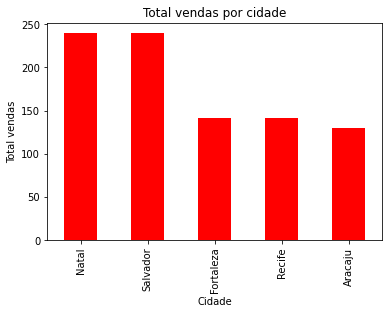

In [65]:
#Alterando a cor
df['Cidade'].value_counts().plot.bar(title='Total vendas por cidade', color='red')
plt.xlabel('Cidade')
plt.ylabel('Total vendas');

In [67]:
#Alterando o estilo
plt.style.use("ggplot")

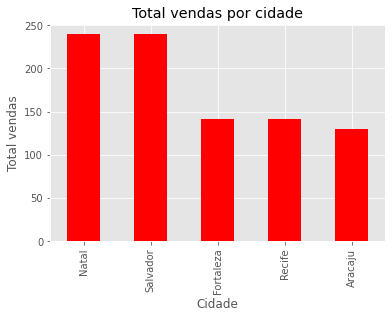

In [68]:
df['Cidade'].value_counts().plot.bar(title='Total vendas por cidade', color='red')
plt.xlabel('Cidade')
plt.ylabel('Total vendas');

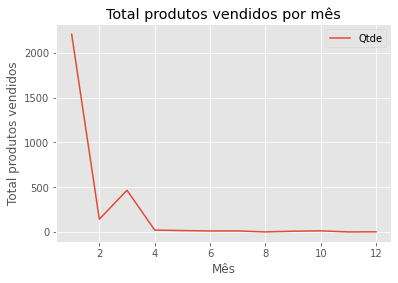

In [72]:
df.groupby(df['mes_venda'])['Qtde'].sum().plot(title='Total produtos vendidos por mês')
plt.xlabel('Mês')
plt.ylabel('Total produtos vendidos')
plt.legend();

In [73]:
df.groupby(df['mes_venda'])['Qtde'].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [83]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

In [84]:
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum()

mes_venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

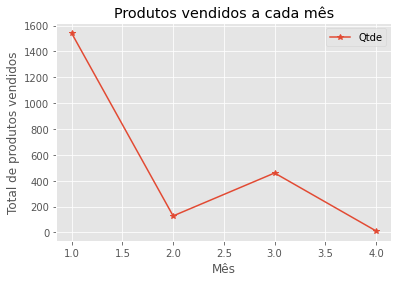

In [82]:
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(title='Produtos vendidos a cada mês', marker = '*')
plt.xlabel('Mês')
plt.ylabel('Total de produtos vendidos')
plt.legend();

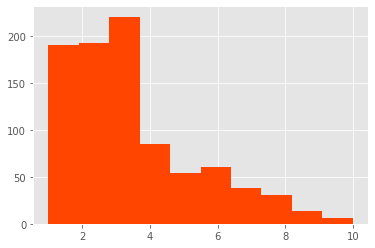

In [88]:
#Histograma
plt.hist(df['Qtde'], color='orangered');

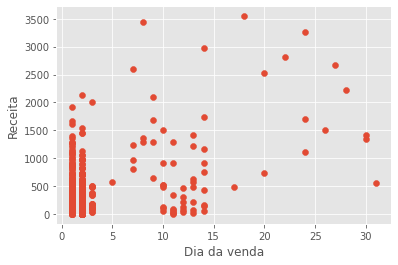

In [91]:
plt.scatter(x=df_2019['dia_venda'], y=df_2019['Receita'])
plt.xlabel('Dia da venda')
plt.ylabel('Receita');

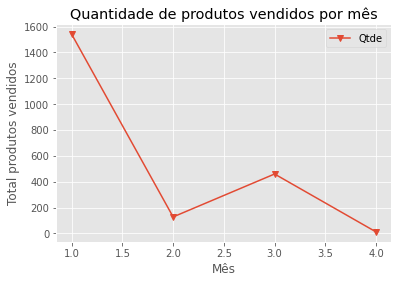

In [92]:
#Salvando em png
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(marker='v')
plt.title('Quantidade de produtos vendidos por mês')
plt.xlabel("Mês")
plt.ylabel('Total produtos vendidos')
plt.legend()
plt.savefig('grafico QTDE x MES.png')